In [5]:
from spike_train_tools.ising import run_metropolis, plot_ising_overview, activity, covariance, fit_ising
from spike_train_tools.tools import simulate_spiketrains

import numpy as np
import matplotlib.pyplot as plt

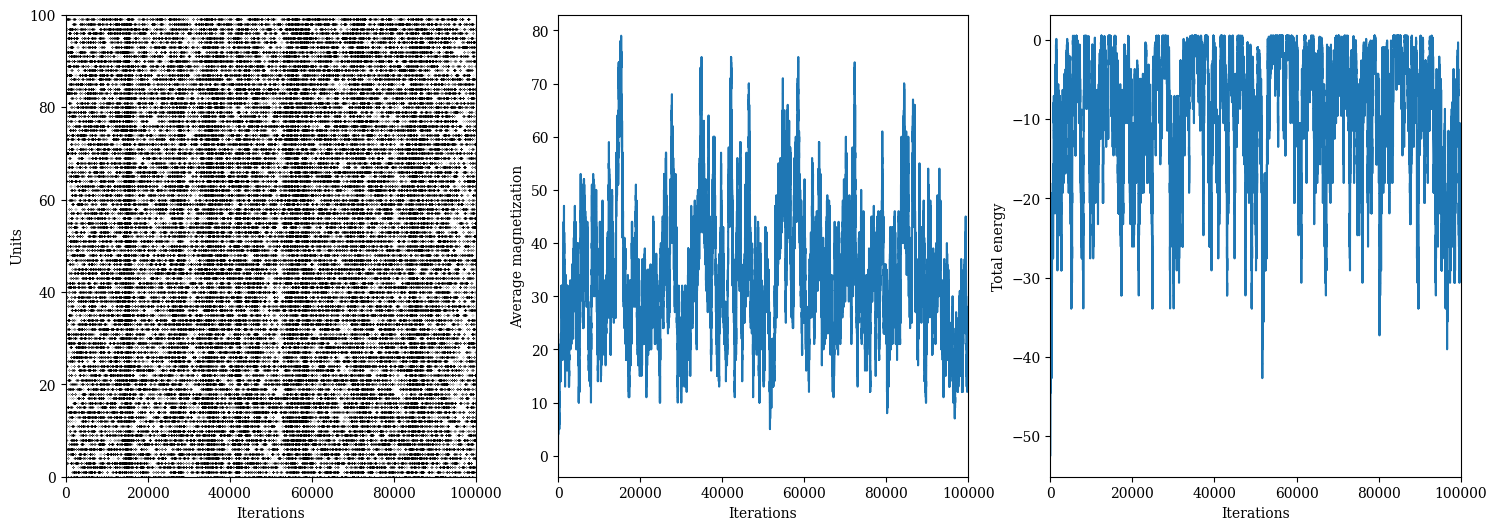

In [6]:
N_neurons = 100
state0 = -1*np.ones(N_neurons)
N_iterations = 100000
h = -0.03*np.ones(N_neurons)
J = 0.01*np.ones((N_neurons, N_neurons))
J[np.diag_indices(N_neurons)] = 0

states, energies = run_metropolis(state0, N_iterations, h, J)

plot_ising_overview(states, energies)

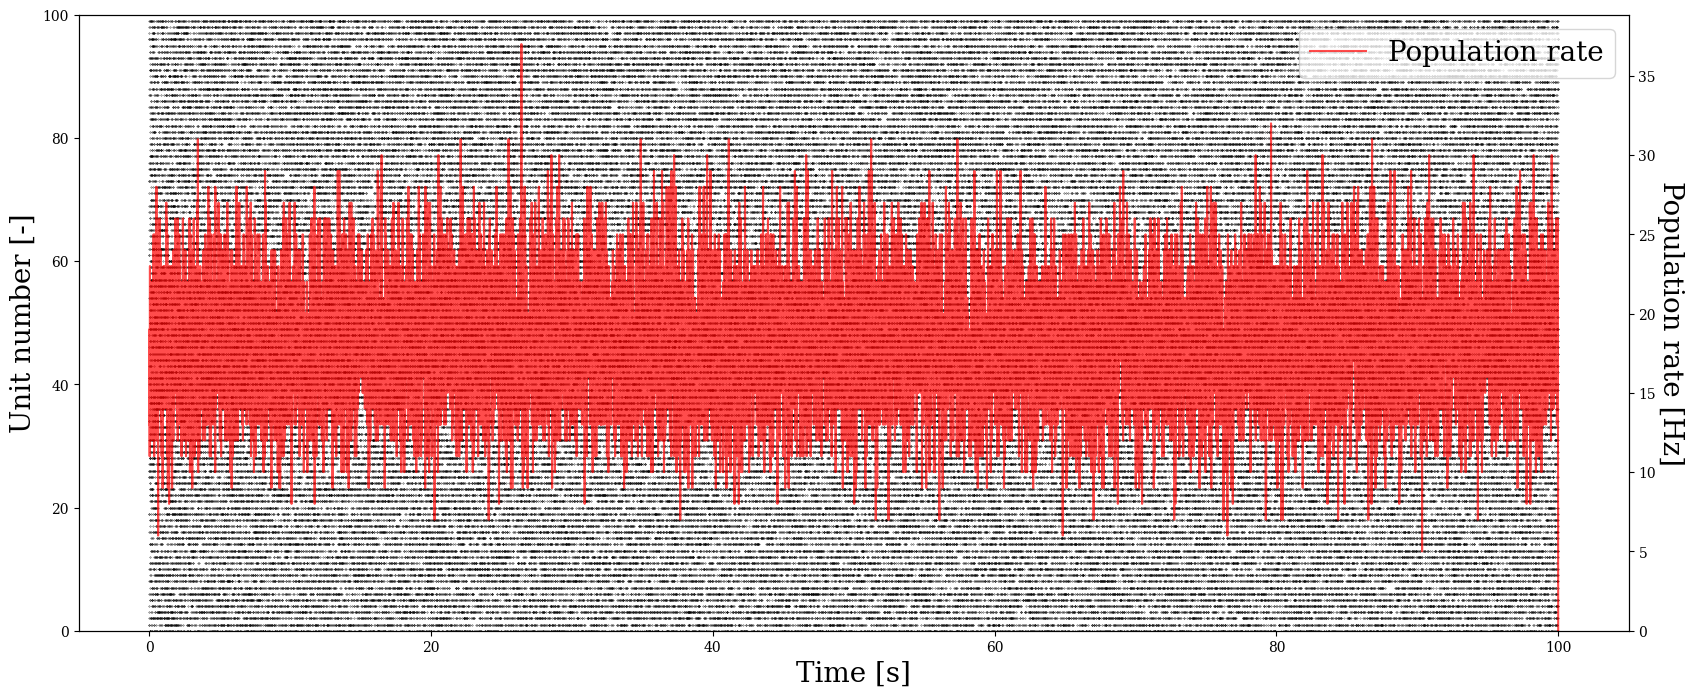

100%|██████████| 999/999 [04:06<00:00,  4.05it/s]


In [4]:
N_neurons = 100
N_its_eq = 1000
N_its_fit = 1000
N_its_sim = 1000

#simulate data as observations
#h_sim = 0*np.ones(N_neurons)
#J_sim = 0.001*np.ones((N_neurons, N_neurons))
#J_sim[np.diag_indices(N_neurons)] = 0

#states_obs, energies_obs = stt.run_metropolis(state0, N_its_eq + N_its_sim, h_sim, J_sim)
#trains_obs = states_obs[:,-1*int(N_its_sim):]
sample_rate = 100
t_tot = 100
rate = 20

trains_obs = simulate_spiketrains(N_neurons, rate, t_tot, sample_rate)

rate_total = np.sum(trains_obs, axis=0)
time_rate_total = np.linspace(0, 100, t_tot*sample_rate+1)

unit_numbers = np.arange(0, len(trains_obs))

_, ax1 = plt.subplots(figsize=(20, 8))

for i, train in enumerate(trains_obs):

    if i == 0:
        label = 'Firings'
    else:
        label = None

    ax1.scatter(np.where(train)[0]/sample_rate, 
                np.full_like(np.where(train)[0], unit_numbers[i]), 
                s=.07, color='k', label=label)

ax1.set_ylabel('Unit number [-]', fontsize=20)
ax1.set_ylim(0, len(trains_obs))

ax2 = ax1.twinx() 
ax2.plot(time_rate_total, rate_total, c='r', alpha=.7, label='Population rate')
ax2.set_ylim(0, 1.05*np.max(rate_total))
ax2.set_ylabel('Population rate [Hz]', rotation=270, labelpad=20, fontsize=20)
plt.legend(fontsize=20)

ax1.set_xlabel('Time [s]', fontsize=20)

plt.show()

activity_obs = activity(trains_obs)
cov_obs = covariance(trains_obs)

#stt.plot_ising_overview(states_obs, energies_obs)

# make initial guesses
h = -0.01*np.ones(N_neurons)
J = 0.01*np.ones((N_neurons, N_neurons))
J[np.diag_indices(N_neurons)] = 0
state0 = -1*np.ones(N_neurons)

h, J, info = fit_ising(trains_obs, h, J, N_its_eq, N_its_fit, state0)

In [4]:
def plot_fit_results(h, J, info):
    fig, axs = plt.subplots(4, 2, figsize=(8, 12))

    axs[0,0].hist(h, bins=20, color='k')
    axs[0,0].set_xlabel(r'$h_i$')
    axs[0,0].set_ylabel('Counts')

    axs[0,1].hist(J[np.triu_indices(np.shape(J)[0], k=1)], bins=20, color='k')
    axs[0,1].set_xlabel(r'$J_{ij}$')
    axs[0,1].set_ylabel('Counts')

    axs[1,0].plot(info['h_mean'], c='k')
    axs[1,0].set_xlabel('Iterations')
    axs[1,0].set_ylabel(r'$\langle h_i\rangle$')

    axs[1,1].plot(info['J_mean'], c='k')
    axs[1,1].set_xlabel('Iterations')
    axs[1,1].set_ylabel(r'$\langle J_{ij}\rangle$')

    axs[2,0].plot(info['h_std'], c='k')
    axs[2,0].set_xlabel('Iterations')
    axs[2,0].set_ylabel(r'$\sigma_{h}$')

    axs[2,1].plot(info['J_std'], c='k')
    axs[2,1].set_xlabel('Iterations')
    axs[2,1].set_ylabel(r'$\sigma_J$')

    axs[3,0].plot(np.mean(info['act_err'], axis=1), c='k')
    axs[3,0].set_xlabel('Iterations')
    axs[3,0].set_ylabel('activity error')

    axs[3,1].plot(np.mean(info['cov_err'], axis=1), c='k')
    axs[3,1].set_xlabel('Iterations')
    axs[3,1].set_ylabel('covariance error')

    for row in axs:
        for ax in row:
            ax.grid(True)

    plt.show()

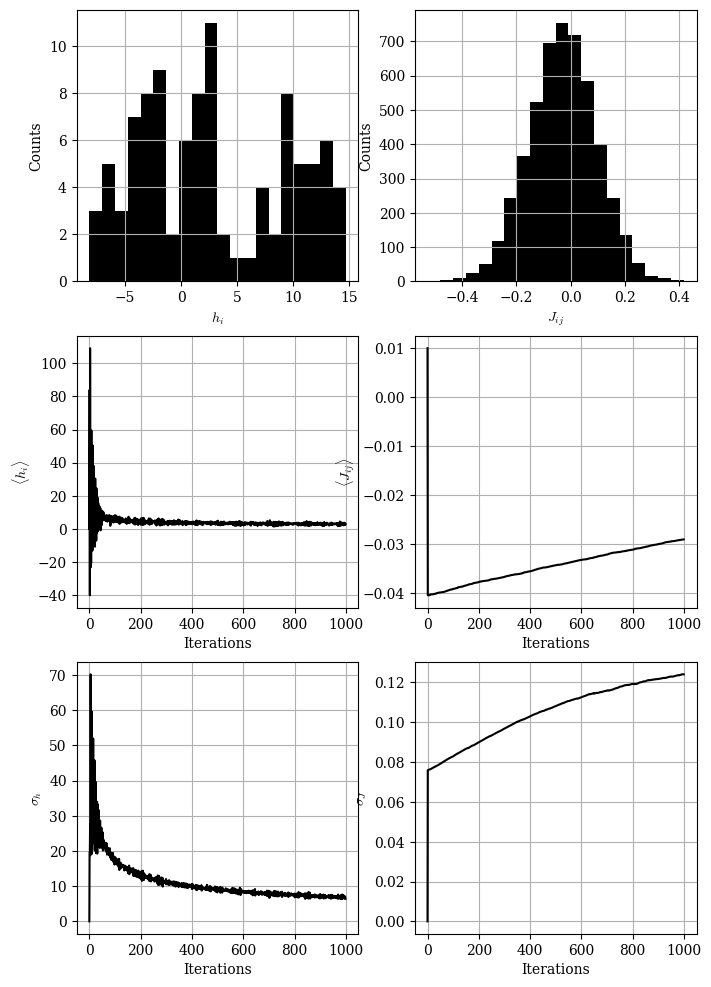

In [6]:
plot_fit_results(h, J, info)

KEY                  SHAPE                TYPE                 VALUE
units                (65,)                ndarray[dict]        array([{'unit_id': 29, 'spike_train': array([  73313,   88115,   88224,   88298,
locations            (978, 2)             ndarray[ndarray]     array([[ 787.5, 1032.5],       [1522.5,  805. ],       [1050. ,  892.5],       .
fs                   ()                   ndarray              array(20000.)                                                                   

Each entry of the array of units is a dictionary:

unit_id              ()                   int                  29                                                                              
spike_train          (49,)                ndarray[int64]       array([  73313,   88115,   88224,   88298,  112396,  322585,  322677,        538
x_max                ()                   float64              2537.5                                                                          
y_max          

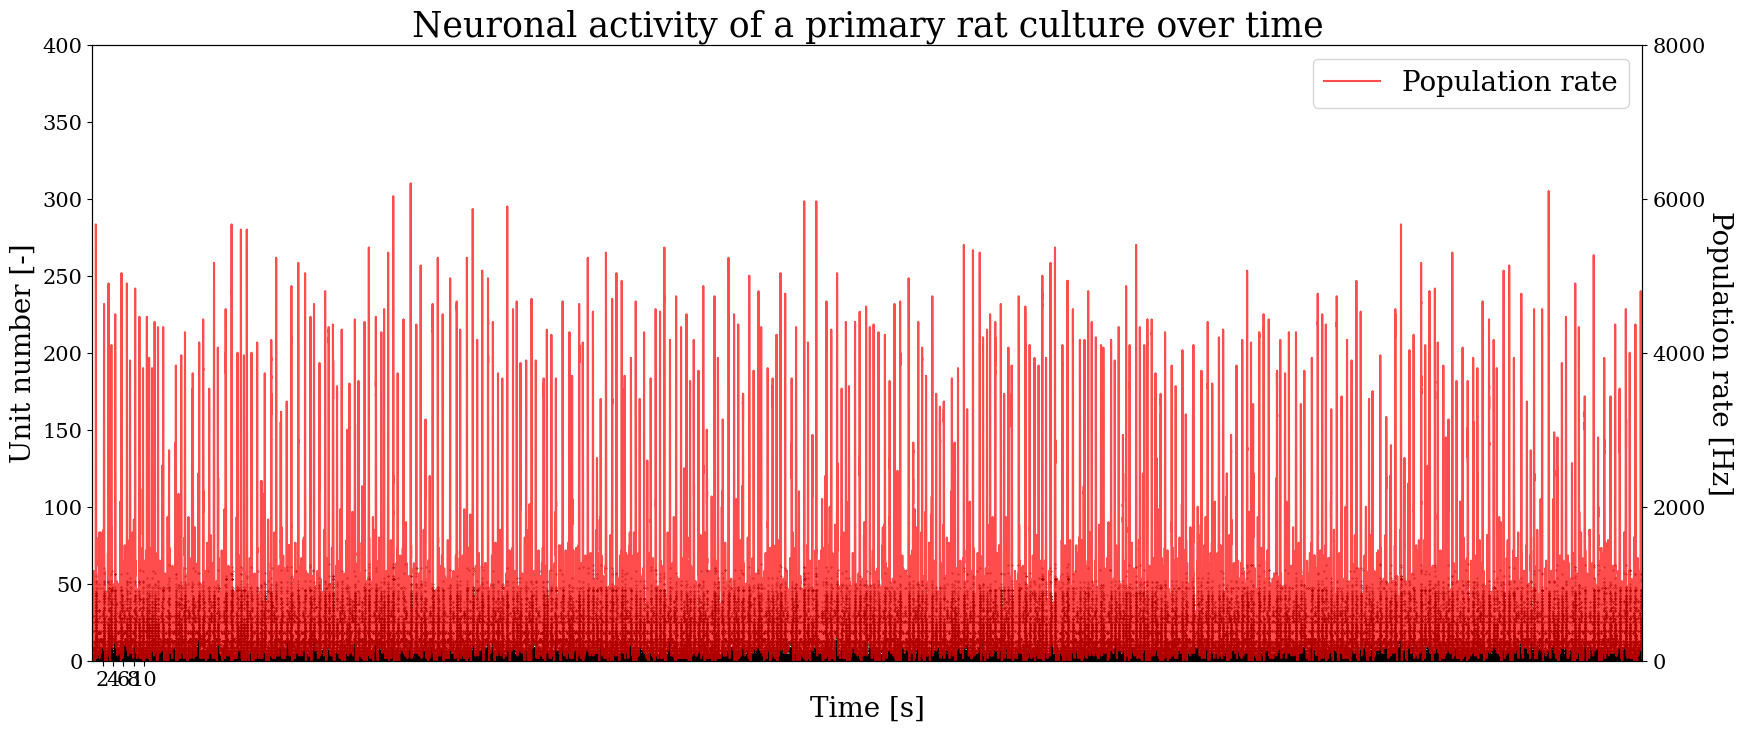

 74%|███████▎  | 7373/9999 [4:44:38<1:41:22,  2.32s/it]


KeyboardInterrupt: 

: 

In [4]:
from MEAData import MEAData

file_path = 'C:\\Users\\bow-lab\\Documents\\Code\\data\\ABAB\\ABAB_3\\25286\\A_1\\chunk0\\sorted.npz'

mea_data = MEAData(file_path, file_type='raw', pressure=0.0, overview=True)

mea_data.raster_plot()

trains_obs = 2*mea_data.convert_trains_to_binary()[:,:200000] - 1

N_neurons = mea_data.N_units
N_its_eq = 1000
N_its_fit = 10000

activity_obs = activity(trains_obs)
cov_obs = covariance(trains_obs)

#stt.plot_ising_overview(states_obs, energies_obs)

# make initial guesses
h = -0.01*np.ones(N_neurons)
J = 0.01*np.ones((N_neurons, N_neurons))
J[np.diag_indices(N_neurons)] = 0
state0 = -1*np.ones(N_neurons)

h, J, info = fit_ising(trains_obs, h, J, N_its_eq, N_its_fit, state0)

In [ ]:
trains_obs = np.loadtxt('C:\\Users\\bow-lab\\Documents\\Code\\data\\Sampaio et. al\\sample1.dat', delimiter=',').T

N_neurons, N_samples = np.shape(trains_obs)

N_its_eq = 1000
N_its_fit = 60000

activity_obs = activity(trains_obs)
cov_obs = covariance(trains_obs)

# make initial guesses
h = -0.01*np.ones(N_neurons)
J = 0.01*np.ones((N_neurons, N_neurons))
J[np.diag_indices(N_neurons)] = 0
state0 = -1*np.ones(N_neurons)

h, J, info = fit_ising(trains_obs, h, J, N_its_eq, N_its_fit, state0,
                           h_learning_rate=.001, h_learning_rate_scaling=0,
                           J_learning_rate=.001, J_learning_rate_scaling=0)

100%|██████████| 59999/59999 [11:39:25<00:00,  1.43it/s]  


In [36]:
trains_obs = np.loadtxt('C:\\Users\\bow-lab\\Documents\\Code\\data\\Sampaio et. al\\sample2.dat', delimiter=',').T


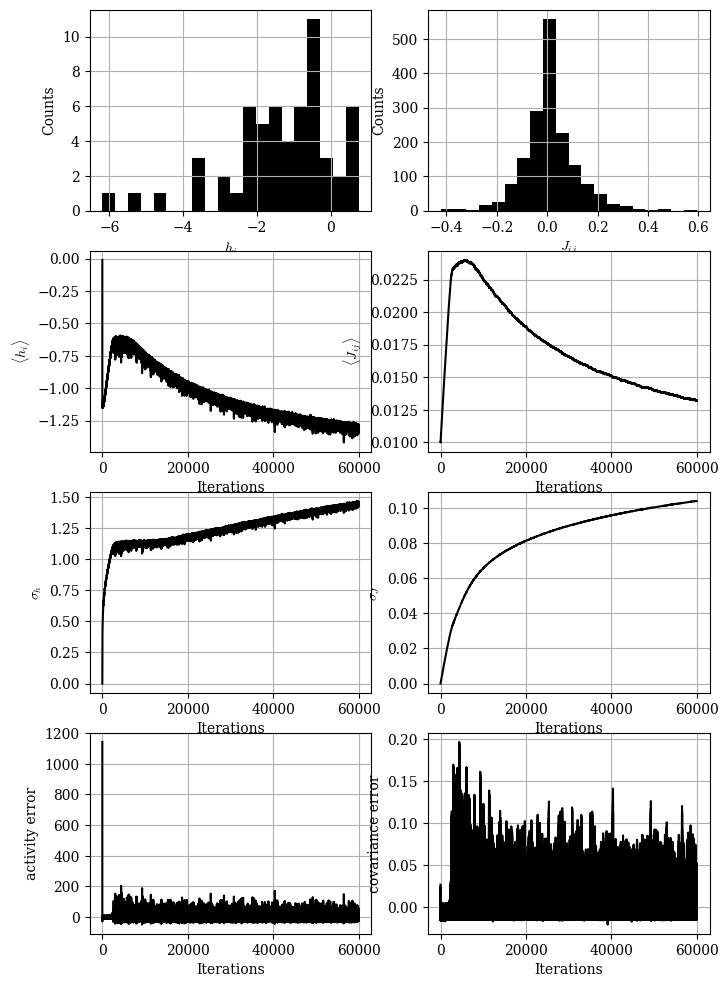

In [21]:
plot_fit_results(h, J, info)

(50000.0, 60000.0)

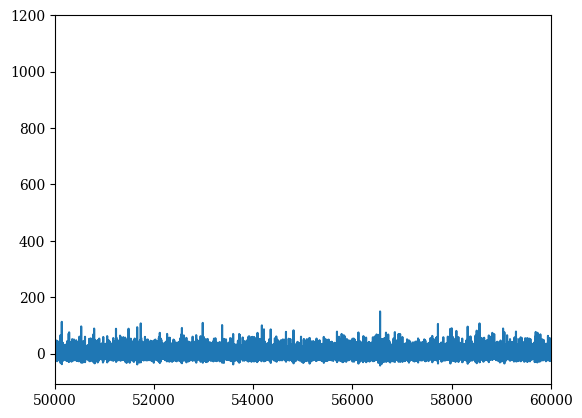

In [23]:
plt.plot(np.mean(info['act_err'], axis=1))
plt.xlim(5e4, 6e4)

In [9]:
np.shape(info['act_err'])

(9999, 58)

(array([ 3.,  1.,  5., 11.,  6., 11.,  7.,  4.,  3.,  2.]),
 array([-237.5726354 , -194.86419956, -152.15576371, -109.44732786,
         -66.73889201,  -24.03045617,   18.67797968,   61.38641553,
         104.09485138,  146.80328723,  189.51172307]),
 <BarContainer object of 10 artists>)

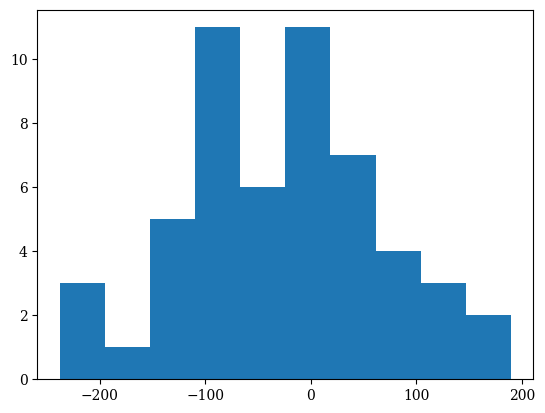

In [19]:
plt.hist(h[np.where(h>=-500)])

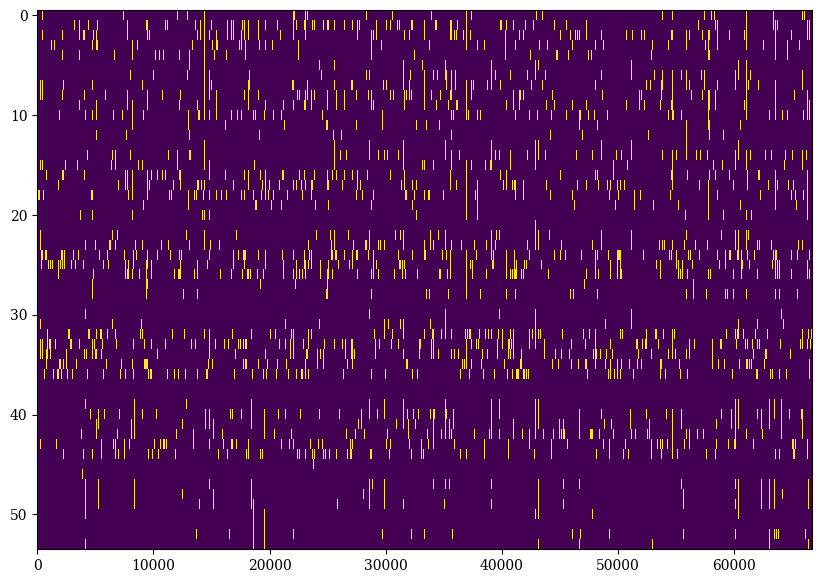

In [57]:
trains_obs = np.loadtxt('C:\\Users\\bow-lab\\Documents\\Code\\data\\Sampaio et. al\\sample3.dat', delimiter=',').T

plt.figure(figsize=(10, 7))
plt.imshow(trains_obs, aspect='auto', interpolation='nearest')

In [37]:
cov = covariance(trains_obs)

(array([ 0.40118889,  0.64190223,  2.2466578 ,  6.25854672, 23.26895574,
        44.45172924, 20.78158461, 16.84993347,  9.78900897,  4.01188892,
         1.92570668,  0.88261556,  0.72214001,  0.16047556,  0.24071334]),
 array([-0.03895812, -0.03141852, -0.02387892, -0.01633932, -0.00879972,
        -0.00126012,  0.00627948,  0.01381908,  0.02135868,  0.02889828,
         0.03643788,  0.04397747,  0.05151707,  0.05905667,  0.06659627,
         0.07413587]),
 <BarContainer object of 15 artists>)

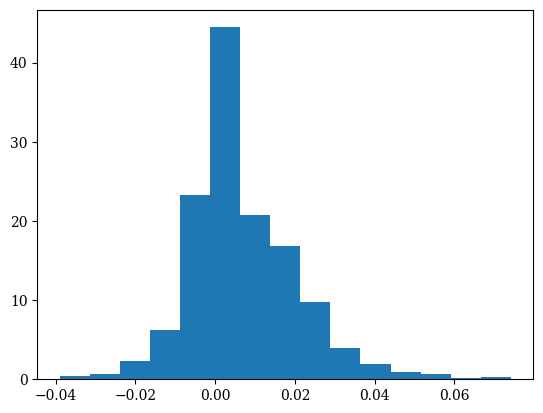

In [38]:
plt.hist(cov[np.triu_indices(np.shape(cov)[0], k=1)], bins=15, density=True)

In [28]:
trains_obs, np.shape(trains_obs)

(array([[-1., -1.,  1., ..., -1., -1., -1.],
        [-1., -1., -1., ...,  1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1.,  1.]]),
 (58, 75204))

In [29]:
np.shape(activity(trains_obs))

(58,)

In [31]:
np.mean(trains_obs, axis=1)

array([-0.90737195, -0.8752194 , -0.89519175, -0.99864369, -0.99986703,
       -0.91713207, -0.94335408, -0.91330248, -0.94601351, -0.95830009,
       -0.91963193, -0.99922876, -0.93290251, -0.9038615 , -0.88569757,
       -0.87652253, -0.89872879, -0.91407372, -0.95678421, -0.93891282,
       -0.88519228, -0.84825275, -0.85923621, -0.93933833, -0.84391788,
       -0.98047976, -0.93593426, -0.90939312, -0.88011276, -0.90141482,
       -0.87487368, -0.91976491, -0.92689219, -0.74844423, -0.90551035,
       -0.84588586, -0.83224297, -0.94045529, -0.91032392, -0.91364821,
       -0.85710866, -0.96274134, -0.96734216, -0.90112228, -0.81668528,
       -0.89011223, -0.95186426, -0.96654433, -0.83809372, -0.90138822,
       -0.99984043, -0.99978725, -0.89189405, -0.88370299, -0.93577469,
       -0.96226265, -0.9282485 , -0.84471571])

In [34]:
cov[np.triu_indices(np.shape(cov)[0], k=1)]

array([0.03226927, 0.03220448, 0.0015764 , ..., 0.02143994, 0.02631912,
       0.05252494])